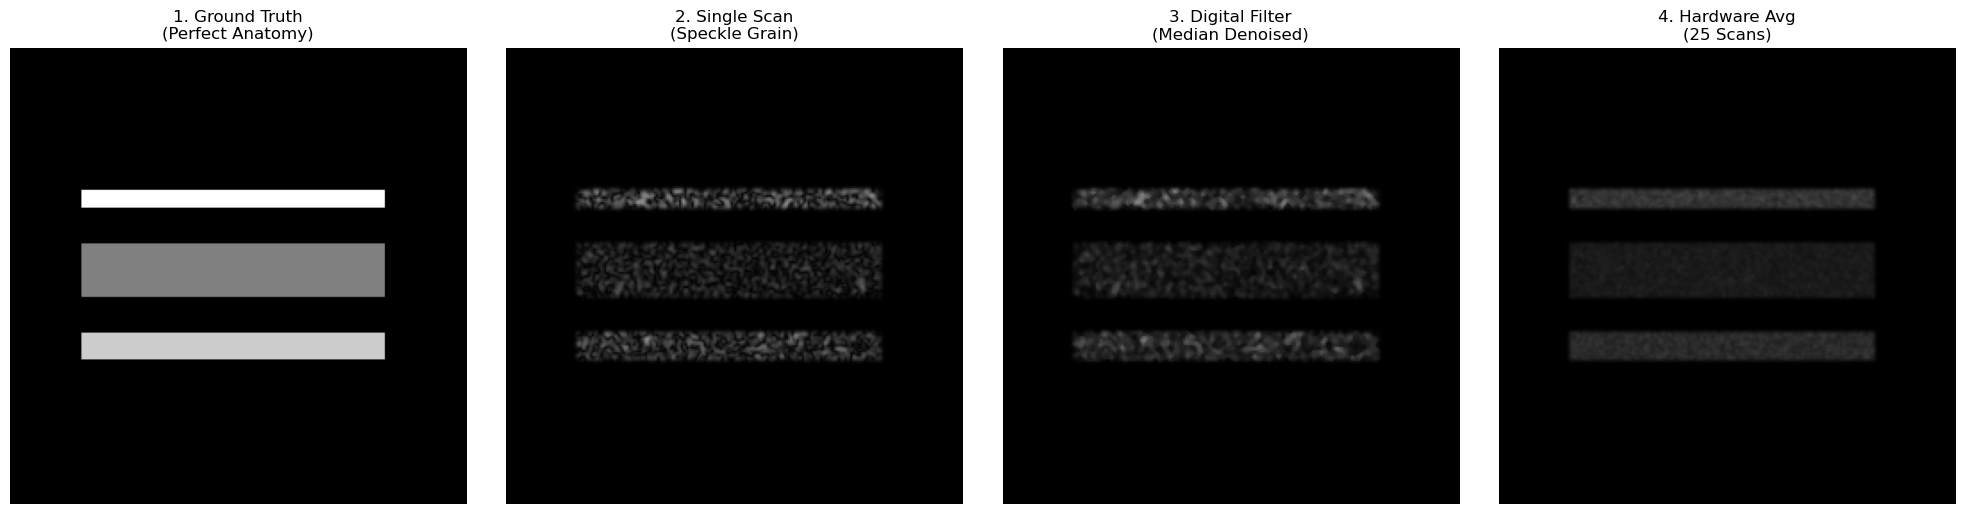

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, gaussian_filter

# 1. Generate the "Ground Truth" (The perfect anatomy)
img_size = 256
ground_truth = np.zeros((img_size, img_size))
# Simulating three retinal-like layers with different reflectivities
ground_truth[80:90, 40:210] = 1.0   # Nerve Fiber Layer (Bright)
ground_truth[110:140, 40:210] = 0.5 # Inner Plexiform (Mid)
ground_truth[160:175, 40:210] = 0.8 # Photoreceptors (Bright)

def generate_oct_frame(template):
    """Simulates a real OCT capture with coherent interference (Speckle)"""
    # Create random phase for every pixel
    phase = np.random.uniform(0, 2 * np.pi, template.shape)
    # The physical signal is complex (Amplitude * Phase)
    complex_backscatter = template * np.exp(1j * phase)
    # Convolve with Point Spread Function (PSF) to simulate optical resolution
    psf_sigma = 1.2
    real_comp = gaussian_filter(complex_backscatter.real, sigma=psf_sigma)
    imag_comp = gaussian_filter(complex_backscatter.imag, sigma=psf_sigma)
    # The detector sees the magnitude (Intensity)
    return np.sqrt(real_comp**2 + imag_comp**2)

# 2. Run Simulations
single_frame = generate_oct_frame(ground_truth)
# Average 25 frames to show hardware-level noise reduction
multi_frame_avg = np.mean([generate_oct_frame(ground_truth) for _ in range(25)], axis=0)
# Apply a digital Median filter to a single noisy frame
median_denoised = median_filter(single_frame, size=3)

# 3. Visualization
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

titles = ["1. Ground Truth\n(Perfect Anatomy)", 
          "2. Single Scan\n(Speckle Grain)", 
          "3. Digital Filter\n(Median Denoised)", 
          "4. Hardware Avg\n(25 Scans)"]

imgs = [ground_truth, single_frame, median_denoised, multi_frame_avg]

for ax, img, title in zip(axes, imgs, titles):
    ax.imshow(img, cmap='gray', vmin=0, vmax=1)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()